In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext lab_black

In [2]:
import logging
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from replay_trajectory_classification import (
    SortedSpikesClassifier,
    ClusterlessClassifier,
)

from src.figure_utilities import (
    PAGE_HEIGHT,
    ONE_COLUMN,
    TWO_COLUMN,
    save_figure,
    set_figure_defaults,
)
from src.parameters import STATE_COLORS, TRANSITION_TO_CATEGORY

set_figure_defaults()

In [3]:
from glob import glob
import os
import pandas as pd
from src.parameters import PROCESSED_DATA_DIR, STATE_COLORS, STATE_ORDER
from src.figure_utilities import TWO_COLUMN, PAGE_HEIGHT, save_figure
import seaborn as sns
import matplotlib.pyplot as plt
from src.visualization import (
    plot_category_counts,
    plot_category_duration,
    plot_linear_position_markers,
)

from loren_frank_data_processing import make_tetrode_dataframe
from src.parameters import ANIMALS, STATE_ORDER, _BRAIN_AREAS

tetrode_info = make_tetrode_dataframe(ANIMALS)

data_type, dim = "clusterless", "1D"
n_unique_spiking = 2

file_paths = glob(
    os.path.join(PROCESSED_DATA_DIR, f"*_{data_type}_{dim}_replay_info.csv")
)
replay_info = pd.concat(
    [pd.read_csv(file_path) for file_path in file_paths], axis=0,
).set_index(["animal", "day", "epoch", "ripple_number"])
replay_info = replay_info.loc[
    replay_info.n_unique_spiking >= n_unique_spiking
].sort_index()

is_brain_areas = tetrode_info.area.astype(str).str.upper().isin(_BRAIN_AREAS)
n_tetrodes = (
    tetrode_info.loc[is_brain_areas]
    .groupby(["animal", "day", "epoch"])
    .tetrode_id.count()
    .rename("n_tetrodes")
)
replay_info = pd.merge(
    replay_info.reset_index(), pd.DataFrame(n_tetrodes).reset_index()
).set_index(["animal", "day", "epoch", "ripple_number"])

for state in STATE_ORDER:
    replay_info[f"{state}_pct_unique_spiking"] = (
        replay_info[f"{state}_n_unique_spiking"] / replay_info["n_tetrodes"]
    )
replay_info = replay_info.rename(index={"Cor": "cor"}).rename_axis(
    index={"animal": "Animal ID"}
)
replay_info

start_time  \
Animal ID day epoch ripple_number                              
cor       1   2     1              0 days 00:22:39.771534985   
                    2              0 days 00:23:00.114870107   
                    3              0 days 00:23:16.240204859   
                    4              0 days 00:23:21.014871945   
                    5              0 days 00:23:21.862205353   
...                                                      ...   
remy      37  4     297            0 days 01:48:51.756666666   
                    298            0 days 01:48:52.121999999   
                    299            0 days 01:48:55.523999999   
                    300            0 days 01:48:56.427333333   
                    301            0 days 01:48:57.831333333   

                                                    end_time  duration  \
Animal ID day epoch ripple_number                                        
cor       1   2     1              0 days 00:22:39.809534988  0.038000   
                    2              0 days 00:23:00.142870110  0.028000   
                    3              0 days 00:23:16.308871531  0.068667   
                    4              0 days 00:23:21.102871953  0.088000   
                    5              0 days 00:23:21.910205357  0.048000   
...                                                      ...       ...   
remy      37  4     297            0 days 01:48:51.840666666  0.084000   
                    298            0 days 01:48:52.191999999  0.070000   
                    299            0 days 01:48:55.604666666  0.080667   
                    300            0 days 01:48:56.514666666  0.087333   
                    301            0 days 01:48:57.919333333  0.088000   

                                   Continuous_duration  Fragmented_duration  \
Animal ID day epoch ripple_number                                             
cor       1   2     1                            0.000                0.000   
                    2                            0.000                0.000   
                    3                            0.000                0.000   
                    4                            0.078                0.000   
                    5                            0.000                0.000   
...                                                ...                  ...   
remy      37  4     297                          0.006                0.000   
                    298                          0.000                0.000   
                    299                          0.000                0.028   
                    300                          0.000                0.026   
                    301                          0.000                0.000   

                                   Fragmented-Continuous-Mix_duration  \
Animal ID day epoch ripple_number                                       
cor       1   2     1                                           0.000   
                    2                                           0.000   
                    3                                           0.000   
                    4                                           0.004   
                    5                                           0.000   
...                                                               ...   
remy      37  4     297                                         0.000   
                    298                                         0.000   
                    299                                         0.004   
                    300                                         0.002   
                    301                                         0.000   

                                   Hover_duration  \
Animal ID day epoch ripple_number                   
cor       1   2     1                       0.000   
                    2                       0.026   
                    3                       0.030   
           

Text(0.5, 0, 'Ripple duration [ms]')

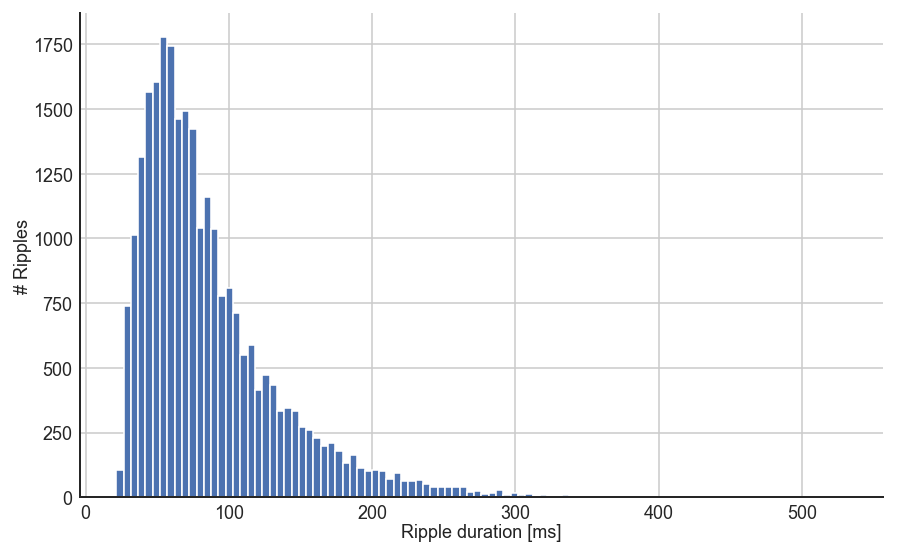

In [14]:
(replay_info.duration * 1000).hist(bins=100)
sns.despine()
plt.ylabel("# Ripples")
plt.xlabel("Ripple duration [ms]")

In [15]:
(replay_info.duration > 0.300).sum()

107

In [16]:
long_ripples_epoch_keys = replay_info.loc[replay_info.duration > 0.300].index
long_ripples_epoch_keys

MultiIndex([( 'cor',  2, 4,  27),
            ( 'cor',  2, 4,  40),
            ( 'cor',  3, 4,  10),
            ( 'cor',  7, 2, 132),
            ( 'cor',  8, 2,  88),
            ( 'bon',  3, 6,  18),
            ( 'bon',  3, 6,  35),
            ( 'bon',  3, 6,  46),
            ( 'bon',  3, 6,  54),
            ( 'bon',  3, 6,  93),
            ...
            ( 'gov', 12, 6, 106),
            ( 'gov', 13, 2,  71),
            ( 'gov', 13, 4,  14),
            ( 'gov', 13, 4,  32),
            ( 'gov', 13, 4,  43),
            ( 'gov', 13, 4, 133),
            ( 'gov', 13, 6,   3),
            ( 'gov', 13, 6,  23),
            ('remy', 35, 4, 221),
            ('remy', 36, 2, 237)],
           names=['Animal ID', 'day', 'epoch', 'ripple_number'], length=107)

Text(0.5, 0, 'Ripple duration [ms]')

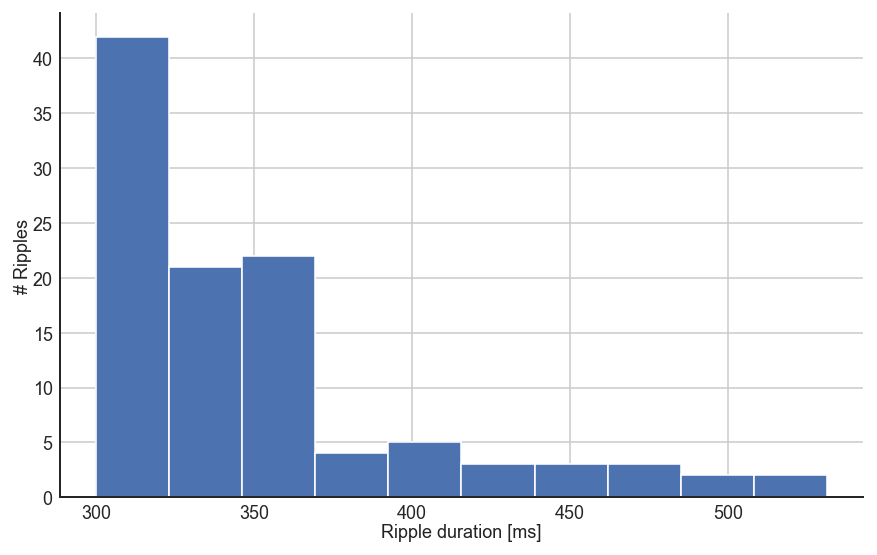

In [17]:
(replay_info.loc[long_ripples_epoch_keys].duration * 1000).hist(bins=10)
sns.despine()
plt.ylabel("# Ripples")
plt.xlabel("Ripple duration [ms]")

In [28]:
replay_info["n_unique_categories"] = replay_info.loc[:, STATE_ORDER].sum(axis=1)

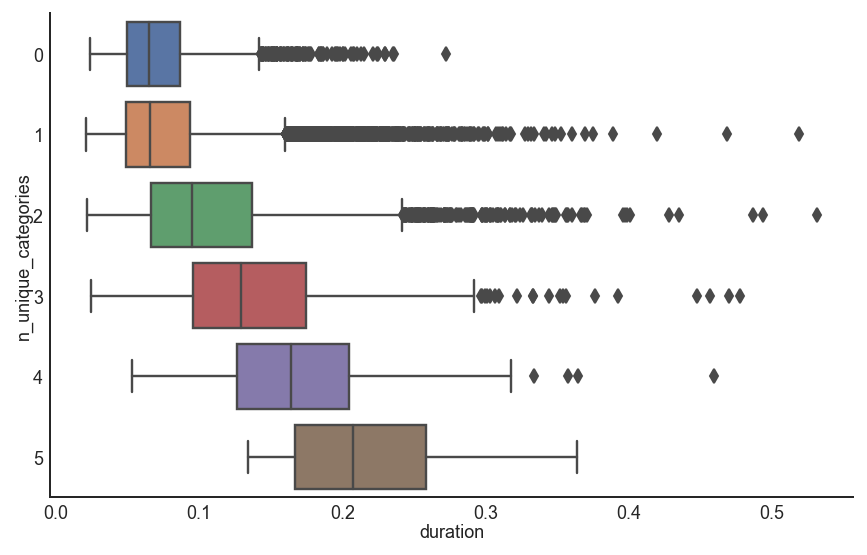

In [38]:
sns.boxplot(
    data=replay_info, x="duration", y="n_unique_categories", orient="horizontal"
)
sns.despine()